In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
class KmeansClassifier:

    def __init__(self, k):
        self.k = k
        self.centroids = None
        self.labels = None

    @staticmethod
    def euc_distance(centroids, x):
        return np.sqrt(np.sum((centroids - x)**2, axis=1))
    
    def fit(self, X, max_iters = 200):
        # Initialize random centroids
        self.centroids = np.random.uniform(low = np.amin(X, axis = 0), high = np.amax(X, axis = 0), size = (self.k, X.shape[1]))
        for _ in range(max_iters):
            y = []
            for point in X:
                # Calculate distance from each centroid for each point
                distances = self.euc_distance(self.centroids, point)
                label = np.argmin(distances)
                # Assign the corresponding label(centroid) to each point
                y.append(label)
            y = np.array(y)

            centroid_points = []
            for i in range(self.k):
                # Append the indices of the points that belong to each centroid
                centroid_points.append(np.argwhere(y == i).flatten())
            
            aux_centroids = self.centroids.copy()
            for centroid, points in enumerate(centroid_points):
                if len(points) == 0:
                    self.centroids[centroid] = aux_centroids[centroid]
                else:
                    self.centroids[centroid] = np.mean(X[points], axis = 0)
            
            if np.allclose(aux_centroids, self.centroids):
                break

            return y

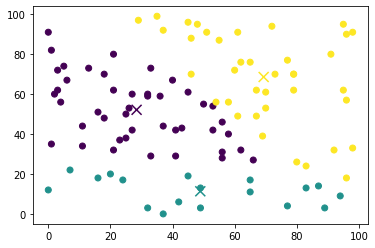

In [15]:
points = np.random.randint(low = 0, high = 100, size = (100, 2))
kmeans = KmeansClassifier(k = 3)
y = kmeans.fit(points)

plt.scatter(points[:, 0], points[:, 1], c = y)
plt.scatter(kmeans.centroids[:, 0], kmeans.centroids[:, 1], c = range(kmeans.k), marker = 'x', s = 100)
plt.show()


In [4]:
y = np.array([1, 2, 3])
X = np.array([[1, 2],[1, 3], [1, 4]])
print(np.argwhere(y == 1).flatten())


[0]
